In [83]:
import yfinance as yf
import pandas as pd

# Tentukan kode saham untuk IHSG
kode_saham = "BNII.JK"

# Tentukan rentang waktu
start_date = "2019-01-01"
end_date = "2025-03-31"

# Ambil data menggunakan yfinance
df = yf.download(kode_saham, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BNII.JK,BNII.JK,BNII.JK,BNII.JK,BNII.JK
Date,,,,,
2019-01-01,170.390411,170.390411,170.390411,170.390411,0
2019-01-02,168.736115,172.044666,168.736115,172.044666,99000
2019-01-03,180.316071,186.933174,168.736139,170.390415,3771800
2019-01-04,175.353241,183.624620,173.698965,180.316069,3073300
2019-01-07,177.007492,180.316043,175.353216,177.007492,561900


In [ ]:
# df.to_excel('IHSG.xlsx')

In [84]:
# Import data
import pandas as pd

# df = pd.read_excel('/content/IHSG.xlsx')
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-01,170.390411,170.390411,170.390411,170.390411,0
1,2019-01-02,168.736115,172.044666,168.736115,172.044666,99000
2,2019-01-03,180.316071,186.933174,168.736139,170.390415,3771800
3,2019-01-04,175.353241,183.624620,173.698965,180.316069,3073300
4,2019-01-07,177.007492,180.316043,175.353216,177.007492,561900


In [85]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
1521,2025-03-21,185.263229
1522,2025-03-24,183.323303
1523,2025-03-25,182.353333
1524,2025-03-26,186.233200
1525,2025-03-27,184.293274


In [ ]:
# data = data[data['Date'] >= '2020-01-01'].reset_index(drop=True)
# data.head()

In [86]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526 entries, 0 to 1525
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1526 non-null   datetime64[ns]
 1   Close   1526 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 24.0 KB


In [87]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [89]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,1526,1526.000000
mean,2022-01-31 12:57:33.735255552,230.497997
min,2019-01-01 00:00:00,96.781921
25%,2020-07-06 06:00:00,200.355545
50%,2022-01-25 12:00:00,222.760239
75%,2023-08-27 06:00:00,253.104218
max,2025-03-27 00:00:00,400.418671
std,NaN,51.941719


In [90]:
# Import the libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout, Bidirectional, Input

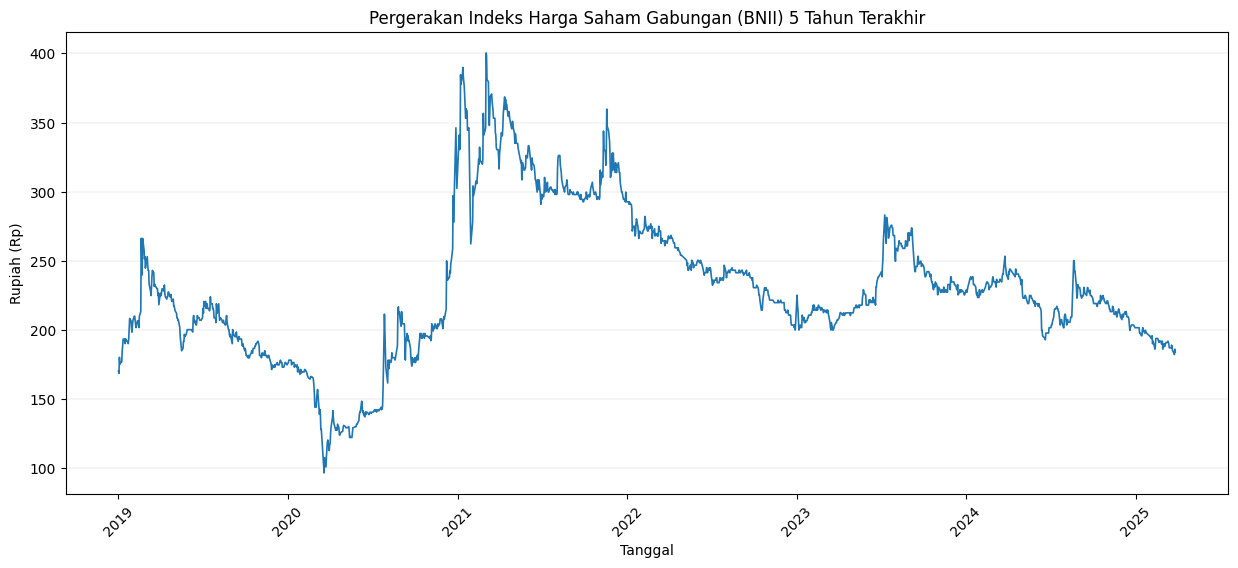

In [91]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Indeks Harga Saham Gabungan (BNII) 5 Tahun Terakhir')
plt.plot(data['Date'], data['Close'], linewidth=1.2)
plt.xlabel('Tanggal')
plt.ylabel('Rupiah (Rp)')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [92]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.24242286],
       [0.23697459],
       [0.27511212],
       ...,
       [0.28182165],
       [0.29459965],
       [0.28821068]])

In [ ]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [ ]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [93]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [94]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 1526
Jumlah data training: 1220
Jumlah data validasi: 154
Jumlah data testing:152


In [95]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [96]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [97]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [98]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [99]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [100]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))

In [101]:
# Membangun model Bi-LSTM
import tensorflow as tf
from keras.layers import Dense, Dropout, Input
from keras.layers import Bidirectional
from keras.models import Sequential

model_bilstm = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(LSTM(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [102]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/weights_bilstm_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [103]:
# Konfigurasi optimizer dan loss function serta Compile Model
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_bilstm.compile(optimizer=op, loss='mean_squared_error')

In [104]:
# Melakukan training pada model LSTM
history_bilstm = model_bilstm.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/100
146/149 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0457
Epoch 1: val_loss improved from inf to 0.00095, saving model to model_checkpoints/weights_bilstm_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0449 - val_loss: 9.4874e-04
Epoch 2/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0044
Epoch 2: val_loss did not improve from 0.00095
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 3/100
146/149 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0035
Epoch 3: val_loss did not improve from 0.00095
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0035 - val_loss: 0.0015
Epoch 4/100
147/149 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0036
Epoch 4: val_loss improved from 0.00095 to 0.00050, saving model to model_checkpoints/weights_bilstm_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0036 - val_loss: 5.0363e-04
Epoch 5/100
147/149 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0036
Epoch 5: val_loss

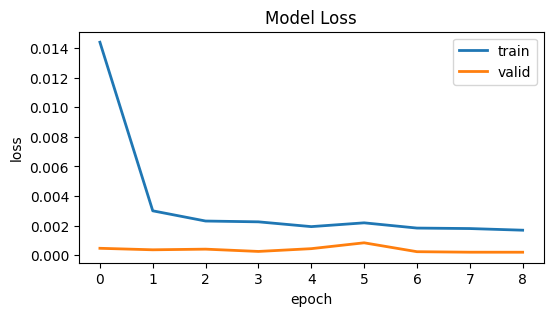

In [105]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'], linewidth=2)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [106]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [107]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [108]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [109]:
# Load bobot model terbaik
model_bilstm.load_weights("/content/model_checkpoints/weights_bilstm_model.weights.h5")

In [110]:
# Melakukan prediksi
y_pred = model_bilstm.predict(x_test)
y_pred = np.ceil(sc.inverse_transform(y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step


In [111]:
# Evaluasi menggunakan metrik MSE, RMSE, MAE dan MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(np.mean(y_test - y_pred)**2), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)

# print(f'MSE  : {mse}')
print(f'RMSE : {rmse}')
# print(f'MAE  : {mae}')
print(f'MAPE : {mape} %')

RMSE : 2.06
MAPE : 2.24 %


In [112]:
# dataframe hasil prediksi
data_pred = data[-test_len:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Close,Prediction
1374,2024-08-15,209.512344,209.0
1375,2024-08-16,209.512344,209.0
1376,2024-08-19,240.551208,209.0
1377,2024-08-20,250.250854,212.0
1378,2024-08-21,250.250854,215.0
...,...,...,...
1521,2025-03-21,185.263229,191.0
1522,2025-03-24,183.323303,191.0
1523,2025-03-25,182.353333,190.0
1524,2025-03-26,186.233200,190.0


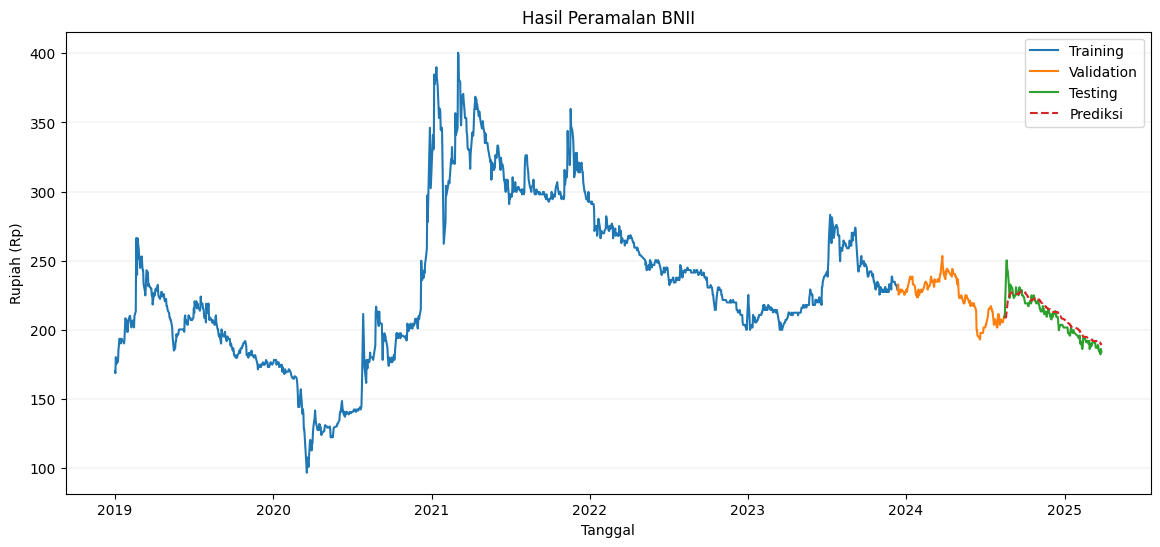

In [113]:
# Visualisasi Prediksi
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan BNII')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Rupiah (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

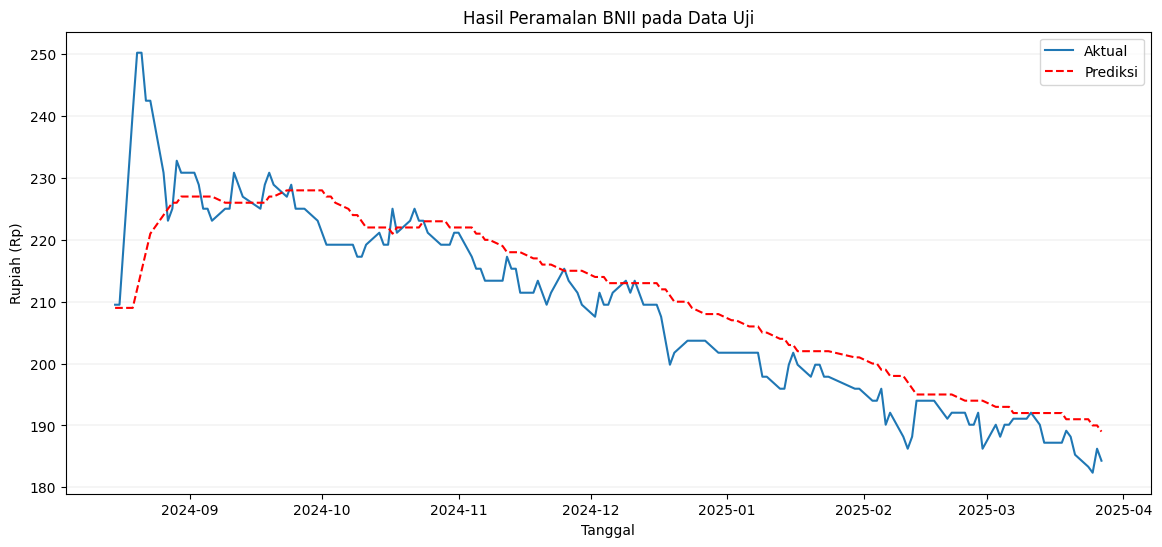

In [115]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan BNII pada Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Rupiah (Rp)')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

**=========================================================**

In [116]:
# Membangun model GRU
import tensorflow as tf
from keras.layers import Dense, Dropout, Input
from keras.layers import Bidirectional
from keras.models import Sequential

model_bigru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(GRU(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [117]:
# Mendefenisikan fungsi Callback
import tensorflow as tf
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

# Model Checkpoint
checkpoint_path = 'model_checkpoints/weights_bigru_model.weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [118]:
# Konfigurasi optimizer dan loss function serta Compile Model
op = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model_bigru.compile(optimizer=op, loss='mean_squared_error')

In [119]:
# Melakukan training pada model LSTM
history_bigru = model_bigru.fit(x_train, y_train, batch_size=8, epochs=100, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])

Epoch 1/100
146/149 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0382
Epoch 1: val_loss improved from inf to 0.00075, saving model to model_checkpoints/weights_bigru_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.0375 - val_loss: 7.4873e-04
Epoch 2/100
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035
Epoch 2: val_loss did not improve from 0.00075
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 3/100
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0022
Epoch 3: val_loss improved from 0.00075 to 0.00065, saving model to model_checkpoints/weights_bigru_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0022 - val_loss: 6.5097e-04
Epoch 4/100
146/149 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021
Epoch 4: val_loss improved from 0.00065 to 0.00034, saving model to model_checkpoints/weights_bigru_model.weights.h5
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0021 - val_loss: 3.4420e-04
Epoch 5/100
14

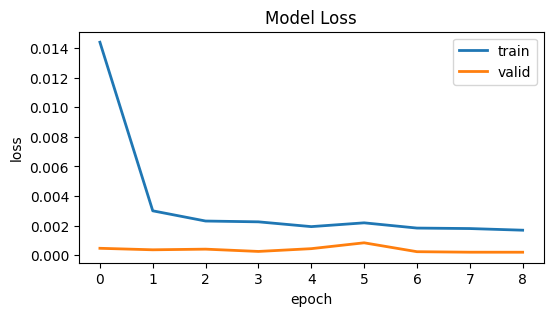

In [120]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history.history['loss'], linewidth=2)
plt.plot(history.history['val_loss'], linewidth=2)
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [121]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [122]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [123]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [124]:
# Load bobot model terbaik
model_bigru.load_weights("/content/model_checkpoints/weights_bigru_model.weights.h5")

In [125]:
# Melakukan prediksi
y_pred = model_bigru.predict(x_test)
y_pred = np.ceil(sc.inverse_transform(y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step


In [126]:
# Evaluasi menggunakan metrik MSE, RMSE, MAE dan MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(np.mean(y_test - y_pred)**2), 2)
mae = round(mean_absolute_error(y_test, y_pred), 2)
mape = round(mean_absolute_percentage_error(y_test, y_pred)*100, 2)

# print(f'MSE  : {mse}')
print(f'RMSE : {rmse}')
# print(f'MAE  : {mae}')
print(f'MAPE : {mape} %')

RMSE : 2.27
MAPE : 1.84 %


In [127]:
# dataframe hasil prediksi
data_pred = data[-test_len:].copy()
data_pred['Prediction'] = y_pred
data_pred

,Date,Close,Prediction
1374,2024-08-15,209.512344,209.0
1375,2024-08-16,209.512344,210.0
1376,2024-08-19,240.551208,211.0
1377,2024-08-20,250.250854,219.0
1378,2024-08-21,250.250854,228.0
...,...,...,...
1521,2025-03-21,185.263229,190.0
1522,2025-03-24,183.323303,190.0
1523,2025-03-25,182.353333,189.0
1524,2025-03-26,186.233200,187.0


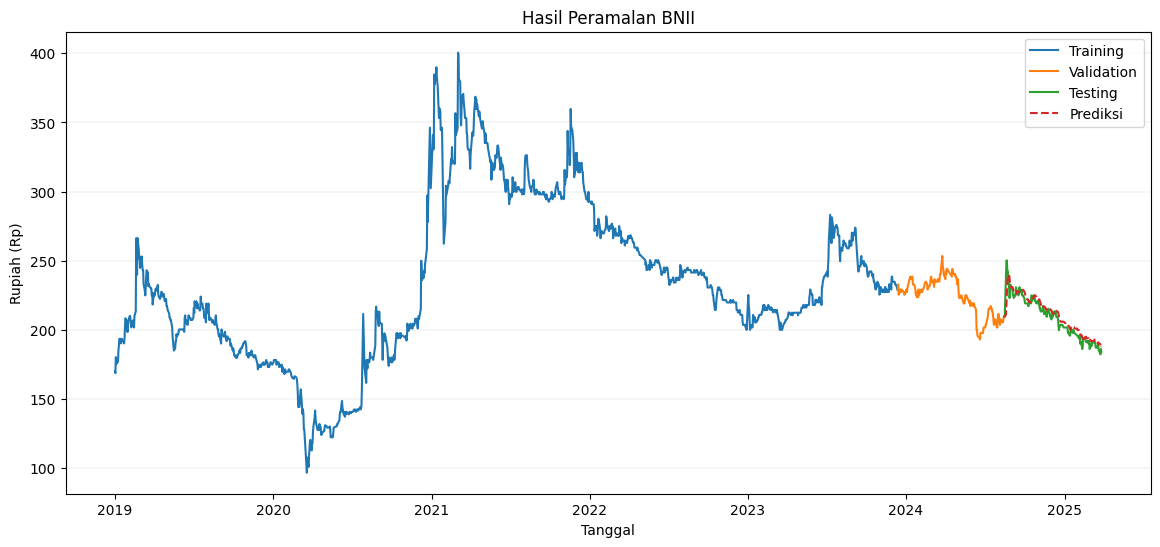

In [128]:
# Visualisasi Prediksi
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan BNII')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred['Date'], data_pred['Close'], label='Testing')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('Rupiah (Rp)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

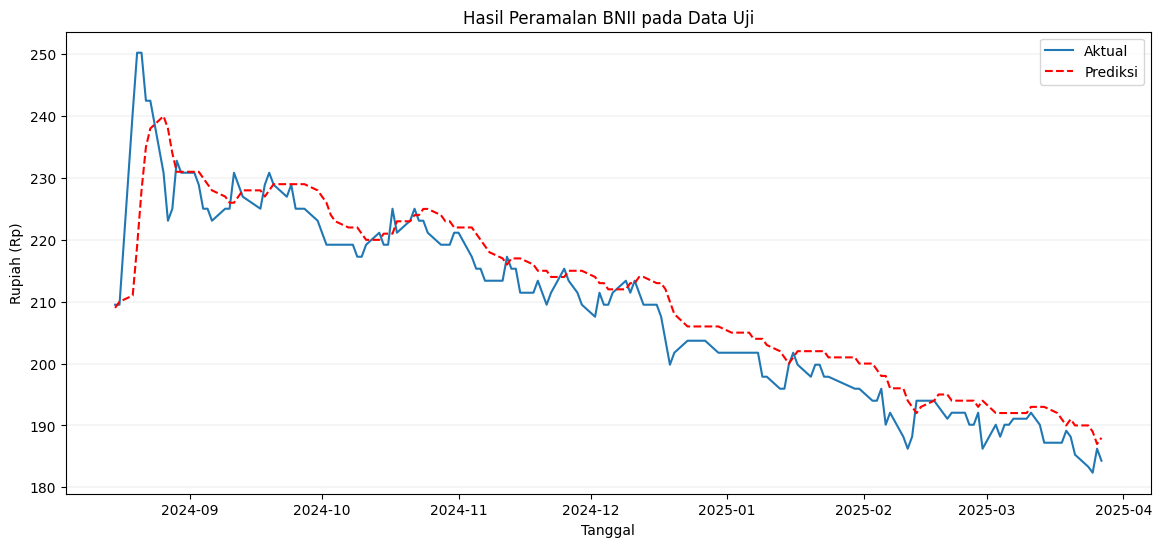

In [129]:
# Visualisasi Prediksi
plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan BNII pada Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Rupiah (Rp)')
plt.plot(data_pred['Date'], data_pred['Close'], label='Aktual')
plt.plot(data_pred['Date'], data_pred['Prediction'], label='Prediksi', color='red', linestyle='--')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [132]:
def forecast_next_30_days(model, last_data, scaler, days=30):
    forecast = []
    input_seq = last_data[-30:].reshape(1, 30, 1)  # ambil 30 data terakhir
    for _ in range(days):
        pred = model.predict(input_seq, verbose=0)
        forecast.append(pred[0,0])
        # Masalahnya ada pada [[pred]]. pred memiliki bentuk (1,1),
        # jadi [[pred]] memiliki bentuk (1,1,1,1).
        # Untuk memperbaikinya, kita ubah bentuk pred ke (1, 1, 1) sebelum ditambahkan:
        input_seq = np.append(input_seq[:,1:,:], pred.reshape(1, 1, 1), axis=1)
    forecast = np.array(forecast)
    forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
    return forecast

In [133]:
# Gunakan model BiLSTM
forecast_bilstm = forecast_next_30_days(model_bilstm, data_sc, sc)

# Gunakan model BiGRU
forecast_bigru = forecast_next_30_days(model_bigru, data_sc, sc)


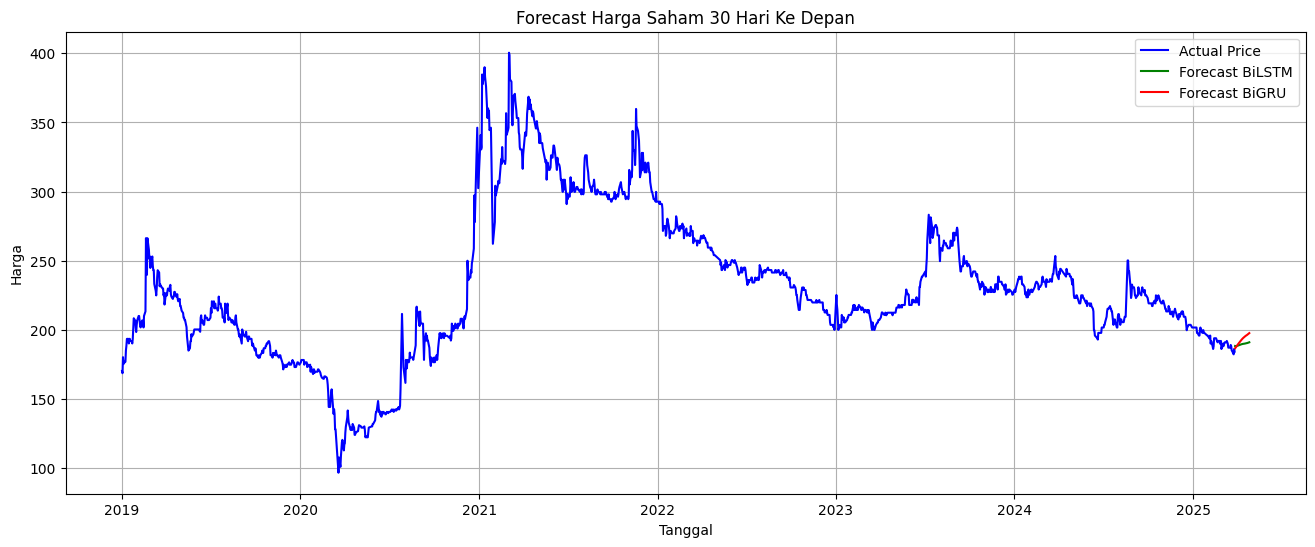

In [134]:
# Plot hasil forecasting
forecast_dates = pd.date_range(data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)

plt.figure(figsize=(16,6))
plt.plot(data['Date'], data['Close'], label='Actual Price', color='blue')
plt.plot(forecast_dates, forecast_bilstm, label='Forecast BiLSTM', color='green')
plt.plot(forecast_dates, forecast_bigru, label='Forecast BiGRU', color='red')
plt.title('Forecast Harga Saham 30 Hari Ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.grid(True)
plt.show()
